In [34]:
#https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html
#https://github.com/jinxin0924/multi-adaboost/blob/master/multi_AdaBoost.py
#https://www.kaggle.com/abisheksudarshan/customer-segmentation/code

In [35]:
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import pandas as pd
from numpy.random import choice

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter


In [37]:
data = pd.read_csv("data/heart.csv")

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

advanced_backend         3339
advanced_front_end       3337
beginner_front_end       3335
beginner_backend         3332
advanced_data_science    3330
beginner_data_science    3327
Name: PROFILE, dtype: int64

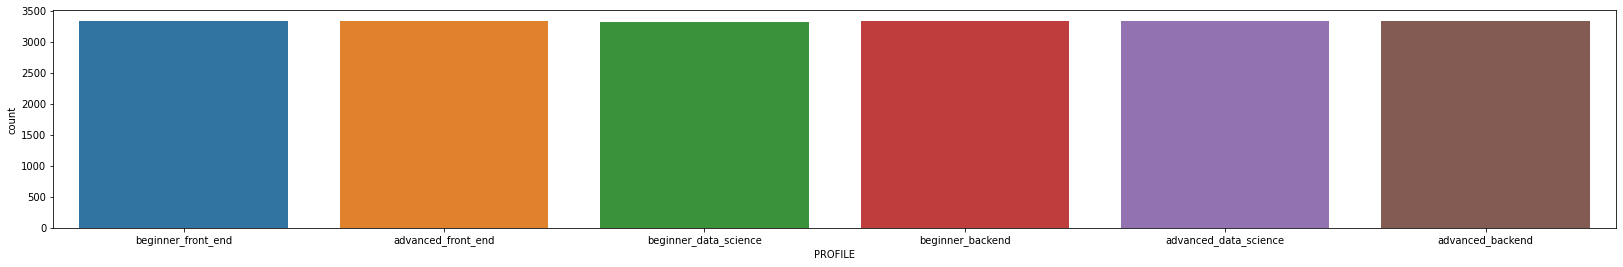

In [245]:
fig, axes = plt.subplots(figsize=(28, 4))

sns.countplot(ax=axes, x='PROFILE', data=data)
data['PROFILE'].value_counts()

In [246]:
data = data.drop(columns = [ 'Unnamed: 0', 'USER_ID','NAME' ])

In [247]:
data = data.dropna().reset_index(drop=True).copy()

In [249]:
data

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0,beginner_backend
1,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0,beginner_data_science
2,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0,advanced_front_end
3,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0,advanced_data_science
4,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0,advanced_front_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19323,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0,advanced_backend
19324,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0,advanced_front_end
19325,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0,advanced_backend
19326,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0,advanced_front_end


In [251]:

le=LabelEncoder()

data['PROFILE']=le.fit_transform(data['PROFILE'])


data.head()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0,3
1,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0,4
2,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0,2
3,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0,1
4,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0,2


In [252]:
X = data.drop('PROFILE', axis=1)
y = data['PROFILE']

#y = np.where(y==0,-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [227]:
cop = cop[cop['Profession'].notna()]
cop.reset_index(inplace=True, drop=True)

In [228]:
cop.drop(columns= ['Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Var_1', 'ID'], inplace=True)

In [229]:
cop['Family_Size'].fillna(0, inplace = True)

In [ ]:
all['Ever_Married']=all['Ever_Married'].fillna('Yes')
all['Graduated']=all['Graduated'].fillna('Yes')
all['Profession'].fillna('Unknown',inplace=True)
all['Profession']=all['Profession'].astype('str')

In [230]:
cop.isnull().any()

Gender            False
Profession        False
Spending_Score    False
Family_Size       False
Segmentation      False
dtype: bool

In [232]:

le=LabelEncoder()

cop['Gender']=le.fit_transform(cop['Gender'])
cop['Profession']=le.fit_transform(cop['Profession'])
cop['Spending_Score']=le.fit_transform(cop['Spending_Score'])
cop['Segmentation']=le.fit_transform(cop['Segmentation'])


cop.head()

,Gender,Profession,Spending_Score,Family_Size,Segmentation
0,1,5,2,4.0,3
1,0,2,0,3.0,0
2,0,2,2,1.0,1
3,1,7,1,2.0,1
4,0,3,1,6.0,0


In [233]:
X = cop.drop('Segmentation', axis=1)
y = cop['Segmentation']

#y = np.where(y==0,-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

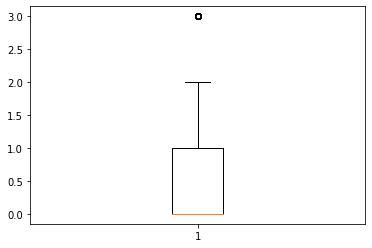

<Figure size 720x504 with 0 Axes>

In [124]:
plt.boxplot(car['class'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [134]:
X = np.arrray(X)

AttributeError: module 'numpy' has no attribute 'arrray'

In [157]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [171]:
nursery = nursery[nursery['Class'] != 3]

In [172]:
nursery.reset_index(inplace=True, drop=True)

In [183]:
le=LabelEncoder()

breat_tissue['Class']=le.fit_transform(breat_tissue['Class'])

nursery.head()

,V1,V2,V3,V4,V5,V6,V7,V8,Class
0,1,1,1,1,1,1,1,2,1
1,1,1,1,1,1,1,1,3,0
2,1,1,1,1,1,1,2,2,1
3,1,1,1,1,1,1,2,3,0
4,1,1,1,1,1,1,3,1,1


In [197]:
X = car.drop('Type', axis=1)
y = car['Type']

#y = np.where(y==0,-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [202]:
penguins = penguins[penguins['sex'].notna()]
penguins.reset_index(inplace=True, drop=True)

In [203]:
penguins.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [204]:

le=LabelEncoder()

penguins['species']=le.fit_transform(penguins['species'])
penguins['island']=le.fit_transform(penguins['island'])
penguins['sex']=le.fit_transform(penguins['sex'])

penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
3,0,2,36.7,19.3,193.0,3450.0,1
4,0,2,39.3,20.6,190.0,3650.0,2


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

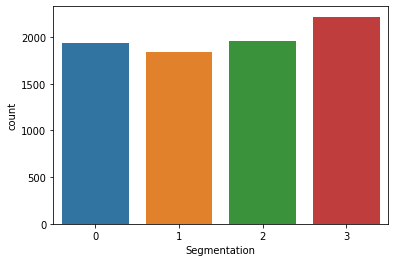

In [234]:

sns.countplot(x = cop['Segmentation'], data = cop)

In [206]:
X = penguins.drop('species', axis=1)
y = penguins['species']

#y = np.where(y==0,-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

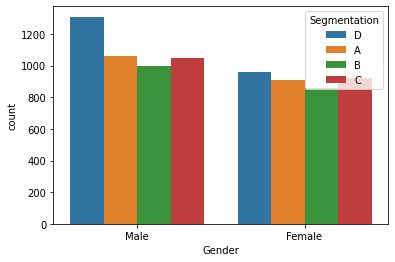

In [59]:
sns.countplot(costumer_segmentation['Gender'],hue=costumer_segmentation['Segmentation'])


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

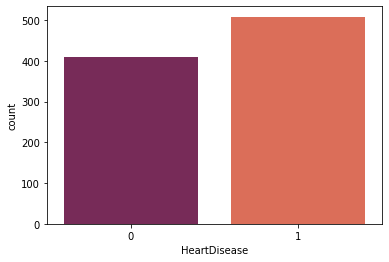

In [8]:

sns.countplot(x = heart_data['HeartDisease'], data = heart_data, palette='rocket')

In [9]:
#Dataset is overall balanced (not noisy data)

In [38]:

le=LabelEncoder()

data['Sex']=le.fit_transform(data['Sex'])
data['RestingECG']=le.fit_transform(data['RestingECG'])
data['ChestPainType']=le.fit_transform(data['ChestPainType'])
data['ExerciseAngina']=le.fit_transform(data['ExerciseAngina'])
data['ST_Slope']=le.fit_transform(data['ST_Slope'])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [39]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

y = np.where(y==0,-1,1)


In [40]:
#make a binary 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [43]:
class BinaryClassAdaboost():
    """
    """
    
    def __init__(self, n_estimators:int):
        """
        Initialialisation of Adaboost class
        Parameters: 
            n_estimators: int:  number of weak learners 
            size: int: size de l'échantillon
        """
        self.n_estimators = n_estimators
        self.list_WL = [] #list with model
        self.list_alpha = [] #list with weight of model 
        self.estimator_errors = []

        
    def fit(self, X, y):
        """
        Fit model 
        Parameters: 
            X: array: data
            y: array: vector of class labels where yi E Y= {1,..., k} and k = 2
        """
        ## Step 1: Initialize the weights to a constant
        n_samples = X.shape[0]      
        self.list_WL = [] 
        self.list_alpha = [] 
        self.estimator_errors = []          
    
    
        ##Weights are initialized to 1/Number of samples: 
        w_t = np.array([1/n_samples for x in range(n_samples)])
        
        ## Step 2: Classify with ramdom sampling of data using a weak learner
        #Construction des weaklearner
        
        #for each weak learner
        for t in range(self.n_estimators):

            #Choose and Call the Base/Weak learner
            
            X_sample, y_sample = self.sampling(X, y, w_t)          
            
            #A decision tree with one depth has one node and is called a stump or weak learner
            WL = DecisionTreeClassifier(max_depth=1)
            #Fit the stump model with the ramdom samples
            WL.fit(X_sample, y_sample) #, sample_weight=w_t_sample
            #Get the predicted classes
            y_pred = WL.predict(X)
            
            ##Step 3: Compute error of weak learner
            eps = BinaryClassAdaboost.error_wl(w_t, y_pred, y)
        
            # if the error of the weak learner is higher then 0.5 (worse then random guess) 
            #don't take into account this learner weight
            if eps > 0.5:
                break
            
            #Step 4: Calculate the performance of the weak learner
            #Performance of the weak learner(α) = 0.5* ln (1 – error/error)
            #Calculate alpha for this weak learner
            alpha_t = 0.5 * np.log((1- eps) / eps)
            

            #Step 5: Update weight
            #With the alpha performance (α) the weights of the wrongly classified records are increased
            #and the weights of the correctly classified records decreased.
            y_temp = -alpha_t * np.multiply(y, y_pred) 
            normalized_w_t = np.multiply(w_t, np.exp(y_temp))

            #normalizing the weigths for the sum to be equal do 1
            w_t = normalized_w_t / sum(normalized_w_t)
            
            #store the alpha performance of each weak learner
            self.list_alpha.append(alpha_t)
            #store each weak learner
            self.list_WL.append(WL)
            self.estimator_errors.append(eps)
   
        return self


    def predict(self, X):
        """
        predict output of Adaboost 
        Paramters: 
            X: array: data
        Return: 
            y_pred: array: data
        """
        #The final prediction is a compromise between all the weak learners predictions
        list_y_pred = []
        
        #for each weak learner get their prediction

        for WL, w in zip(self.list_WL, self.list_alpha):
            #Final prediction is obtained by the weighted by alpha sum of each weak learner prediction
            list_y_pred.append(WL.predict(X) * w)
         
        #the array of all the predictions

        arr_y_pred = np.array(sum(list_y_pred))
 
        #get -1 if y_pred < 0 or 1 if y_pred > 0
        y_pred = np.sign(arr_y_pred)
        
        return y_pred 
        
    def error_wl(w_t, y_pred, y):
        """
        error of current weaklearner
        Parameters:
            w_t: array:  weight of observation
            y_pred: array: output of wl 
            y: array: labels
        Return: 
            eps: float: error of wl 
        """
        
        ind_err = []
        for i in range(y_pred.shape[0]):
            if y_pred[i] != y[i]:
                ind_err.append(1) 
            else: 
                ind_err.append(0) 
    
        w_ind_err = np.multiply(w_t,ind_err)
        
        eps = np.sum(w_ind_err)
    
        return eps
    
    def sampling(self, X, y, w_t):
        """
        sampling X with w_t 
        Parameters:
            X: array: data
            y: array: labels
            w_t: array: weigth
        Return:
            X_sample: array: sample of X
            y_sample: array: labels corresponding to X_sample
        """
        #put X and y in same array to sample 
        y_temp = np.reshape(y, (y.shape[0], 1))
        data = np.hstack((X, y_temp))
        
        #size of sample
        size = int(0.75*X.shape[0])
                
        #get index of data kept
        ch = np.random.choice([x for x in range(data.shape[0])], size=size, p=w_t)
        
        sample = data[ch,:]
        
    
        y_sample = sample[:,-1]
        X_sample = sample[:,:-1]
        
        return X_sample, y_sample
    def get_params(self, deep=True):
        return {'n_estimators': self.n_estimators}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


In [41]:
#------------------------------- BINARY CLASSIFICATIONS ---------------------- #

class BinaryClassAdaboost():
    """
    """
    
    def __init__(self, n_estimators:int):
        """
        Initialialisation of Adaboost class
        Parameters: 
            n_estimators: int:  number of weak learners 
        """
        self.n_estimators = n_estimators
        self.list_WL = [] #list with model
        self.list_alpha = [] #list with weight of model 
        self.estimator_errors = []

        
        
    def fit(self, X, y):
        """
        Fit model 
        Parameters: 
            X: array: data
            y: array: vector of class labels where yi E Y= {1,..., k} and k = 2
        """
        ## Step 1: Initialize the weights to a constant
        n_samples = X.shape[0]                
        w = []
        ##Weights are initialized to 1/Number of samples: 
        w_t = [1/n_samples for x in range(n_samples)]       
              
        
        ## Step 2: Classify with ramdom sampling of data using a weak learner
        #Construction des weaklearner
        
        #for each weak learner
        for t in range(self.n_estimators):

            #Choose and Call the Base/Weak learner
            #A decision tree with one depth has one node and is called a stump or weak learner
            WL = DecisionTreeClassifier(max_depth=1)
            #Fit the stump model with the ramdom samples
            WL.fit(X, y, sample_weight=w_t)
            #Get the predicted classes
            y_pred = WL.predict(X)
            
            ##Step 3: Compute error of weak learner
            eps = self.error_wl(w_t, y_pred, y)
        
            # if the error of the weak learner is higher then 0.5 (worse then random guess) 
            #don't take into account this learner weight
            if eps > 0.5:
                break
            
            #Step 4: Calculate the performance of the weak learner
            #Performance of the weak learner(α) = 0.5* ln (1 – error/error)
            #Calculate alpha for this weak learner
            
            alpha_t = 0.5 * np.log((1- eps) / eps)

            #Step 5: Update weight
            #With the alpha performance (α) the weights of the wrongly classified records are increased
            #and the weights of the correctly classified records decreased.
            y_temp = np.multiply(y, y_pred)
            y_temp2 = -alpha_t * y_temp 
            normalized_w_t = np.multiply(w_t, np.exp(y_temp2))

            #normalizing the weigths for the sum to be equal do 1
            w_t = normalized_w_t / sum(normalized_w_t)
            
            #store the alpha performance of each weak learner
            self.list_alpha.append(alpha_t)
            #store each weak learner
            self.list_WL.append(WL)
            self.estimator_errors.append(eps)

            
            
        return self

    def predict(self, X):
        """
        predict output of Adaboost 
        Paramters: 
            X: array: data
        Return: 
            y_pred: array: data
        """
        #The final prediction is a compromise between all the weak learners predictions
        list_y_pred = []
        
        #for each weak learner get their prediction

        for WL, w in zip(self.list_WL, self.list_alpha):
            #Final prediction is obtained by the weighted by alpha sum of each weak learner prediction
            list_y_pred.append(WL.predict(X) * w)
         
        #the array of all the predictions

        arr_y_pred = np.array(sum(list_y_pred))
 
        #get -1 if y_pred < 0 or 1 if y_pred > 0
        y_pred = np.sign(arr_y_pred)
        
        return y_pred 
        
    def error_wl(self, w_t, y_pred, y):
        """
        error of current weaklearner
        Parameters:
            w_t: array:  weight of observation
            y_pred: array: output of wl 
            y: array: labels
        Return: 
            eps: float: error of wl 
        """
        
        ind_err = []
        for i in range(y_pred.shape[0]):
            if y_pred[i] != y[i]:
                ind_err.append(1) 
            else: 
                ind_err.append(0) 
    
        w_ind_err = np.multiply(w_t,ind_err)
        
        eps = np.sum(w_ind_err)
    
        return eps
    
    def get_params(self, deep=True):
        return {'n_estimators': self.n_estimators}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

        

In [24]:
model = BinaryClassAdaboost(50)
model.fit(X_train, y_train)

In [25]:
model.estimator_errors

[0.1709090909090909,
 0.29192329227323494,
 0.36859260912488523,
 0.34035541366745925,
 0.39222719592186783,
 0.4082733548018487,
 0.3801273603726946,
 0.4106158985870837,
 0.44951006555198836,
 0.4535187483783879,
 0.47434628580774063,
 0.4446950545660523,
 0.4713205061492134,
 0.4727590367338503,
 0.4849822931168144,
 0.4742019318017534,
 0.439327671436457,
 0.4357038674960312,
 0.43854759904909824,
 0.4589101478674038,
 0.46278132163211266,
 0.48494795289890724,
 0.48547538620228065,
 0.48597250069502984,
 0.4766298001500596,
 0.47782205341898376,
 0.47891199323942674,
 0.47030870167163275,
 0.4568239800506436,
 0.46916450666807785,
 0.44822465686410956,
 0.47900100035567894,
 0.454628829624266,
 0.47062605317415573,
 0.4794439973286644,
 0.4723695220773332,
 0.4749051376364361,
 0.47297754429783867,
 0.4596325895434779,
 0.47372137734208497,
 0.48327782148106996,
 0.46124440486034085,
 0.4825139943715761,
 0.48387793388481837,
 0.47765129186692873,
 0.4805251284259636,
 0.477256516

In [26]:
y_pred = model.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.8532608695652174

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5 ,scoring='f1_macro')


In [29]:
scores

array([0.87927641, 0.86800574, 0.80602994, 0.81122573, 0.77903888])

In [43]:
#-------------------------------Multiclass LASSIFICATIONS ---------------------- #


class MultiClassAdaBoost(object):
    '''
    Parameters
    -----------
    base_estimator: object
        The base model from which the boosted ensemble is built.
    n_estimators: integer, optional(default=50)
        The maximum number of estimators
    learning_rate: float, optional(default=1)
    Attributes
    -------------
    estimators_: list of base estimators
    estimator_weights_: array of floats
        Weights for each base_estimator
    estimator_errors_: array of floats
        Classification error for each estimator in the boosted ensemble.
    '''

    def __init__(self, n_estimators, learning_rate):
        self.n_estimators = n_estimators
        self.list_WL = [] #list with model
        self.list_alpha = [] #list with weight of model 
        self.learning_rate_ = learning_rate
        self.estimator_errors = []


    def fit(self, X, y):
        
        ## Step 1: Initialize the weights to a constant
        n_samples = X.shape[0]                
        w = []
        ##Weights are initialized to 1/Number of samples: 
        w_t = [1/n_samples for x in range(n_samples)]       
        
        # So in boost we have to ensure that the predict results have the same classes sort
        self.classes_ = np.array(sorted(list(set(y))))
        self.n_classes_ = len(self.classes_)
        
        
        ## Step 2: Classify with ramdom sampling of data using a weak learner
        #Construction des weaklearner
        
        #for each weak learner
        for t in range(self.n_estimators):
          
            #Choose and Call the Base/Weak learner
            #A decision tree with one depth has one node and is called a stump or weak learner
            WL = DecisionTreeClassifier(max_depth=1)
            #Fit the stump model with the ramdom samples
            WL.fit(X, y, sample_weight=w_t)
            
            y_pred = WL.predict(X)
            
            ##Step 3: Compute error of weak learner
            incorrect = y_pred != y
            estimator_error = np.dot(incorrect, w_t) / np.sum(w_t, axis=0)
            
            # if worse than random guess, stop boosting
            #if estimator_error >= 1 - 1 / self.n_classes_:
            if estimator_error > 0.5:
                break

            # update alphe performance
            alpha_t = self.learning_rate_ * np.log((1 - estimator_error) / estimator_error) + np.log(
            self.n_classes_ - 1)
        

            # update sample weight
            w_t *= np.exp(alpha_t * incorrect)
            sample_weight_sum = np.sum(w_t, axis=0)

            # normalize sample weight
            w_t /= sample_weight_sum
            
            #store the alpha performance of each weak learner
            self.list_alpha.append(alpha_t)
            #store each weak learner
            self.list_WL.append(WL)
            # append error
            self.estimator_errors.append(estimator_error)

        return self


    def predict(self, X):
        n_classes = self.n_classes_
        classes = self.classes_[:, np.newaxis]

        
        pred = sum((estimator.predict(X) == classes).T * w
                   for estimator, w in zip(self.list_WL,
                                           self.list_alpha))

        pred /= sum(self.list_alpha)
        if n_classes == 2:
            pred[:, 0] *= -1
            pred = pred.sum(axis=1)
            return self.classes_.take(pred > 0, axis=0)

        return self.classes_.take(np.argmax(pred, axis=1), axis=0)

In [44]:
X, y = make_gaussian_quantiles(
    n_samples=13000, n_features=10, n_classes=3, random_state=1
)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]


In [45]:
y_test

array([1, 2, 2, ..., 2, 1, 1])

In [46]:
model = MultiClassAdaBoost(50, 0.001)
model.fit(X_train,y_train)


In [47]:
model.estimator_errors

[]

In [48]:
model = MultiClassAdaBoost(50, 0.001)

In [49]:
model.fit(X_train,y_train)

In [50]:
model.estimator_errors

[]

In [51]:
y_pred = model.predict(X_test)

ZeroDivisionError: division by zero

In [92]:
accuracy_score(y_test, y_pred)

0.8179347826086957

In [ ]:
## Explore Weak Learner (use different weak learners or with different parameters)


In [ ]:
## Explore Number of Trees


In [166]:
from sklearn.datasets import load_wine
data = load_iris()
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [167]:
X = data.data

In [168]:
y = data.target

In [44]:
##Comparing with other algo

# Define dictionary with performance metrics

scores = ['accuracy','precision_macro','recall_macro','f1_macro',]
# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4))
my_ada_model = BinaryClassAdaboost(100)
    
    
    
# Define the models evaluation function
def models_evaluation(X, labels, folds):
    
    '''
    X : data set features
    labels : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, labels, cv=folds, scoring=scores)
    svc = cross_validate(svc_model, X, labels, cv=folds, scoring=scores)
    dtr = cross_validate(dtr_model, X, labels, cv=folds, scoring=scores)
    rfc = cross_validate(rfc_model, X, labels, cv=folds, scoring=scores)
    gnb = cross_validate(gnb_model, X, labels, cv=folds, scoring=scores)
    ada = cross_validate(ada_model, X, labels, cv=folds, scoring=scores)
    my_ada = cross_validate(my_ada_model, X, labels, cv=folds, scoring=scores)

    
    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision_macro'].mean(),
                                                               log['test_recall_macro'].mean(),
                                                               log['test_f1_macro'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision_macro'].mean(),
                                                                   svc['test_recall_macro'].mean(),
                                                                   svc['test_f1_macro'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision_macro'].mean(),
                                                       dtr['test_recall_macro'].mean(),
                                                       dtr['test_f1_macro'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision_macro'].mean(),
                                                       rfc['test_recall_macro'].mean(),
                                                       rfc['test_f1_macro'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision_macro'].mean(),
                                                              gnb['test_recall_macro'].mean(),
                                                              gnb['test_f1_macro'].mean()], 
                                       
                                       
                                       'Adaboost Classifier':[ada['test_accuracy'].mean(),
                                                              ada['test_precision_macro'].mean(),
                                                              ada['test_recall_macro'].mean(),
                                                              ada['test_f1_macro'].mean()],
                                        
                                        'My Adaboost Classifier':[my_ada['test_accuracy'].mean(),
                                                              my_ada['test_precision_macro'].mean(),
                                                              my_ada['test_recall_macro'].mean(),
                                                              my_ada['test_f1_macro'].mean()]
                                       },
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X, y, 10)

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\Ap

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\Ap

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\Ap

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\Ap

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\Ap

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\Ap

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\Ap

C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lfurtado\Ap

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Adaboost Classifier,My Adaboost Classifier,Best Score
Accuracy,0.829945,0.827771,0.785248,0.852807,0.845210,0.804826,0.844087,Random Forest
Precision,0.838468,0.835940,0.787581,0.863282,0.863868,0.809110,0.822747,Gaussian Naive Bayes
Recall,0.828376,0.826654,0.785252,0.850160,0.843477,0.802499,0.810283,Random Forest
F1 Score,0.827099,0.825036,0.782726,0.850006,0.840767,0.801583,0.811918,Random Forest
